## Simple Autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images to vectors
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Define autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)  # Bottleneck layer

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Use the encoder part to get encoded representations
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# Use the decoder part to reconstruct images from encoded representations
decoder_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-3](decoder_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoded_imgs = decoder.predict(encoded_imgs)


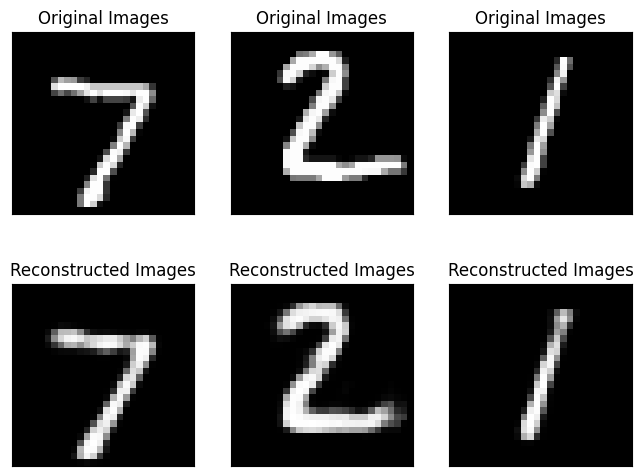

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of images to display
n = 3
# Display original and reconstructed images
plt.figure(figsize=(8, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original Images')
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Reconstructed Images')
plt.show()


## Denoising Autoencoder

In [ ]:
#implement denoising autoencoder
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Flatten images to vectors
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))
# Add noise to the training data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# Clip the values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
# Define autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)  # Bottleneck layer
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# Create the autoencoder model
autoencoder = Model(input_img, decoded)
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))
# Use the encoder part to get encoded representations
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test_noisy)
# Use the decoder part to reconstruct images from encoded representations
decoder_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-3](decoder_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoded_imgs = decoder.predict(encoded_imgs)

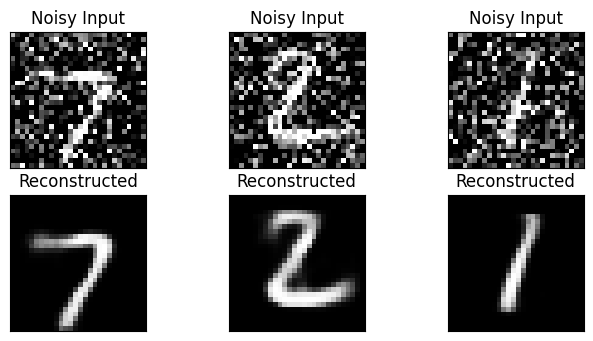

In [ ]:
# Number of images to display
n = 3
# Display original, noisy, and reconstructed images
plt.figure(figsize=(8, 6))
for i in range(n):
    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Noisy Input')

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Reconstructed')
plt.show()

## Sparse autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt


# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Flatten images to vectors
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))
# Define autoencoder architecture with sparsity constraint
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(32, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)  # Bottleneck layer
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# Create the autoencoder model
autoencoder = Model(input_img, decoded)
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50, # Increased epochs for sparsity to take effect
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# Use the encoder part to get encoded representations
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
# Use the decoder part to reconstruct images from encoded representations
decoder_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-3](decoder_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoded_imgs = decoder.predict(encoded_imgs)

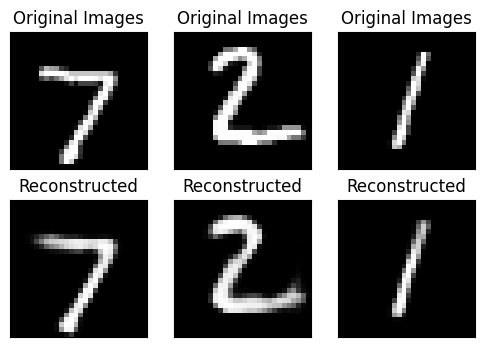

In [ ]:
# Number of images to display
n = 3
# Display original and reconstructed images
plt.figure(figsize=(6, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original Images')
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Reconstructed')
plt.show()